# Compare Embedding Experiment Runs for Next Word Prediction
These experiments fit an LSTM model as described in the research report using different embedding representations of words then fine tuning the embedding layer along with all other model layers over a fixed number of training rounds.

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Load Accuracy and Loss Arrays from Small Model (Batch Size 16)
- From random embeddings
- From GloVe embeddings
- From FastText embeddings

In [2]:
epochs = 800
network = '100_256_100'

In [3]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))[0:epochs]
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))[0:epochs]
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))[0:epochs]
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))[0:epochs]

In [4]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))[0:epochs]
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))[0:epochs]
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))[0:epochs]
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))[0:epochs]

In [5]:
# fasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))[0:epochs]
# fasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))[0:epochs]
# fasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))[0:epochs]
# fasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))[0:epochs]

In [6]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))[0:epochs]
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))[0:epochs]
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))[0:epochs]
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))[0:epochs]

### Plot Train and Validation Loss from Small Model

In [7]:
x_axis = range(0, epochs)

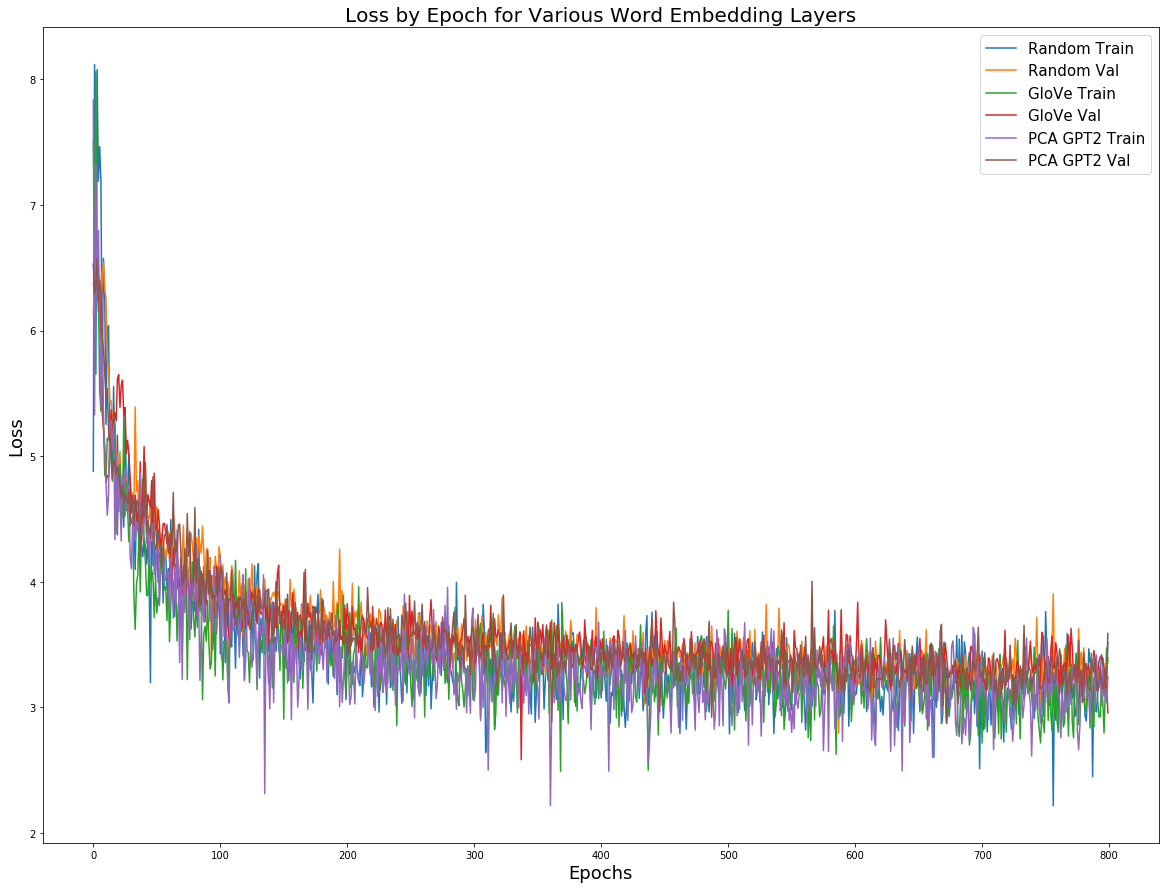

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_loss, label='FastText Train')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pca_gpt2_train_loss, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Small Model

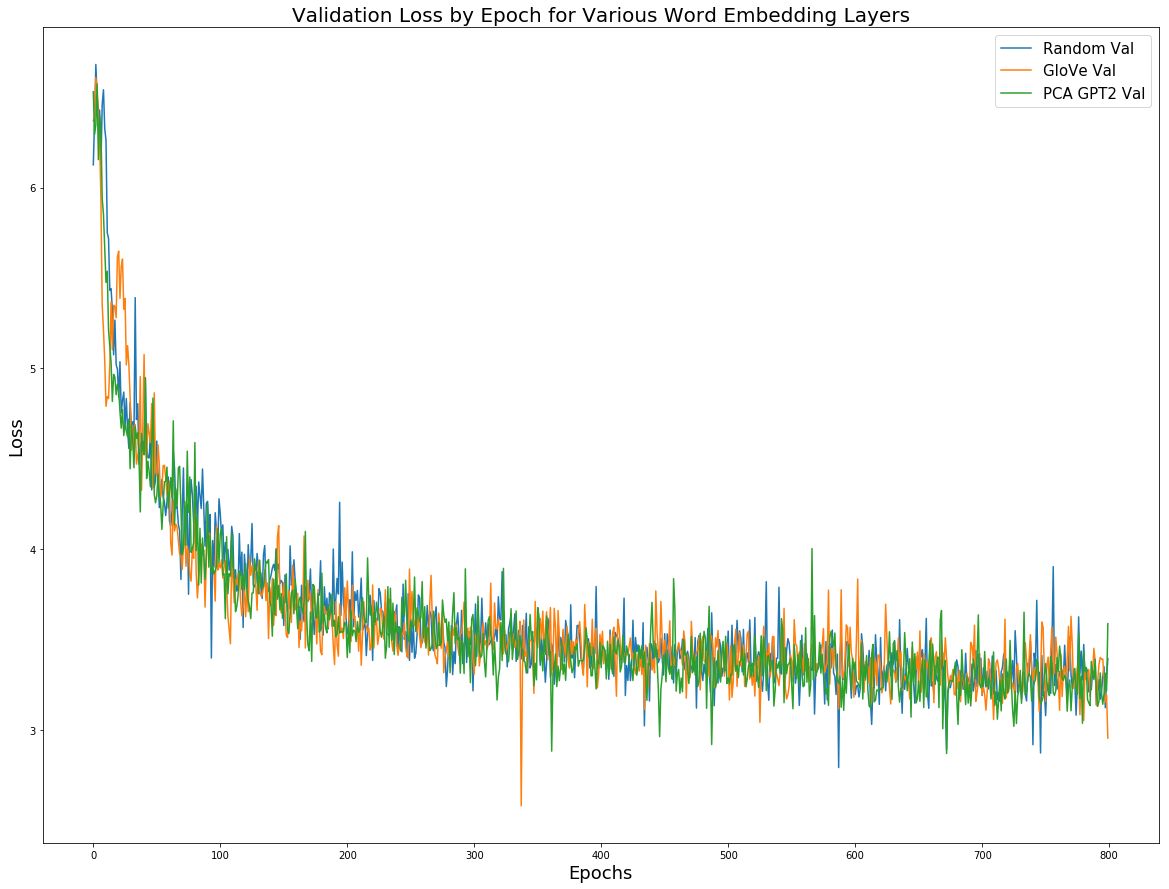

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Small Model

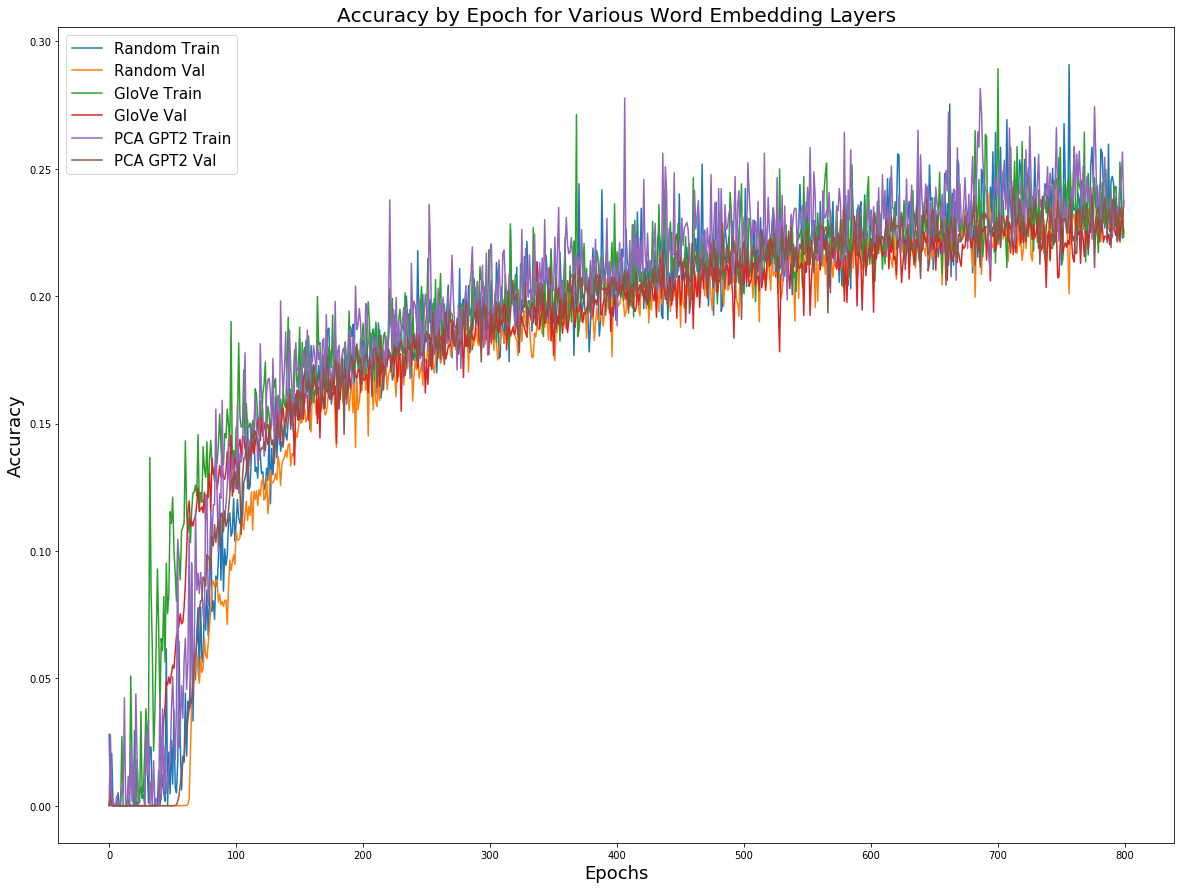

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_accuracy, label='FastText Train')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pca_gpt2_train_accuracy, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Small Model

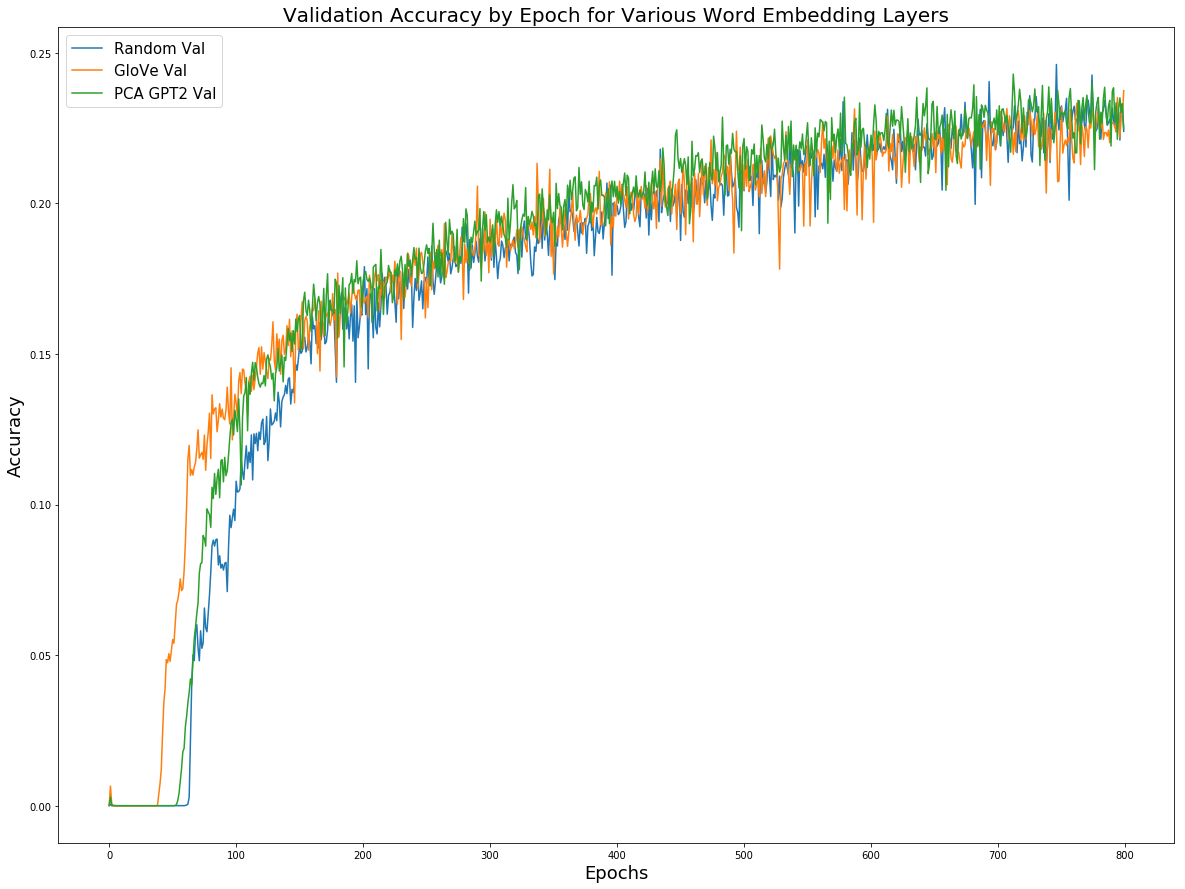

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Load Accuracy and Loss Arrays from Large Model (Batch Size 8)
- From random embeddings
- From GloVe embeddings
- From FastText embeddings

In [12]:
epochs = 400
network = '300_512_300'

In [13]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))[0:epochs]
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))[0:epochs]
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))[0:epochs]
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))[0:epochs]

In [14]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))[0:epochs]
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))[0:epochs]
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))[0:epochs]
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))[0:epochs]

In [15]:
# fasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))[0:epochs]
# fasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))[0:epochs]
# fasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))[0:epochs]
# fasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))[0:epochs]

### Plot Train and Validation Loss from Large Model

In [16]:
x_axis = range(0, epochs)

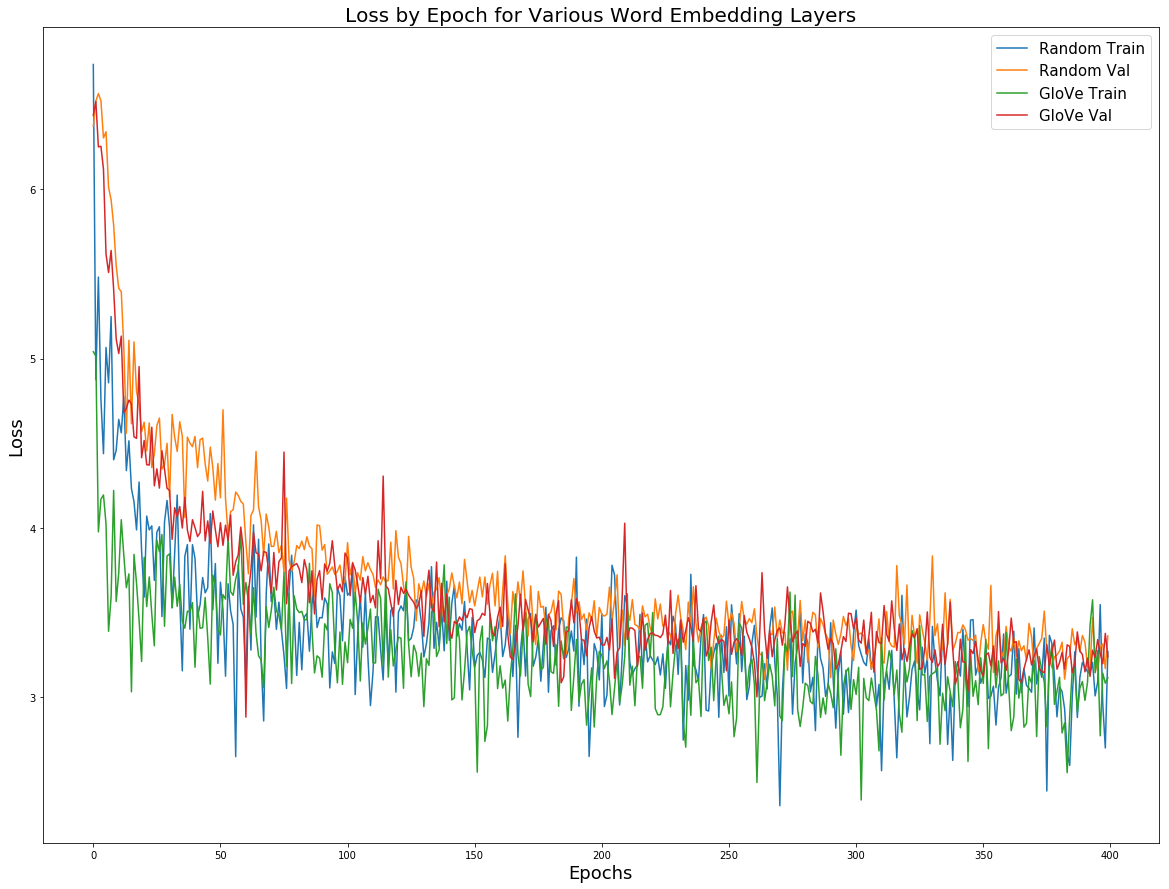

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_loss, label='FastText Train')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Large Model

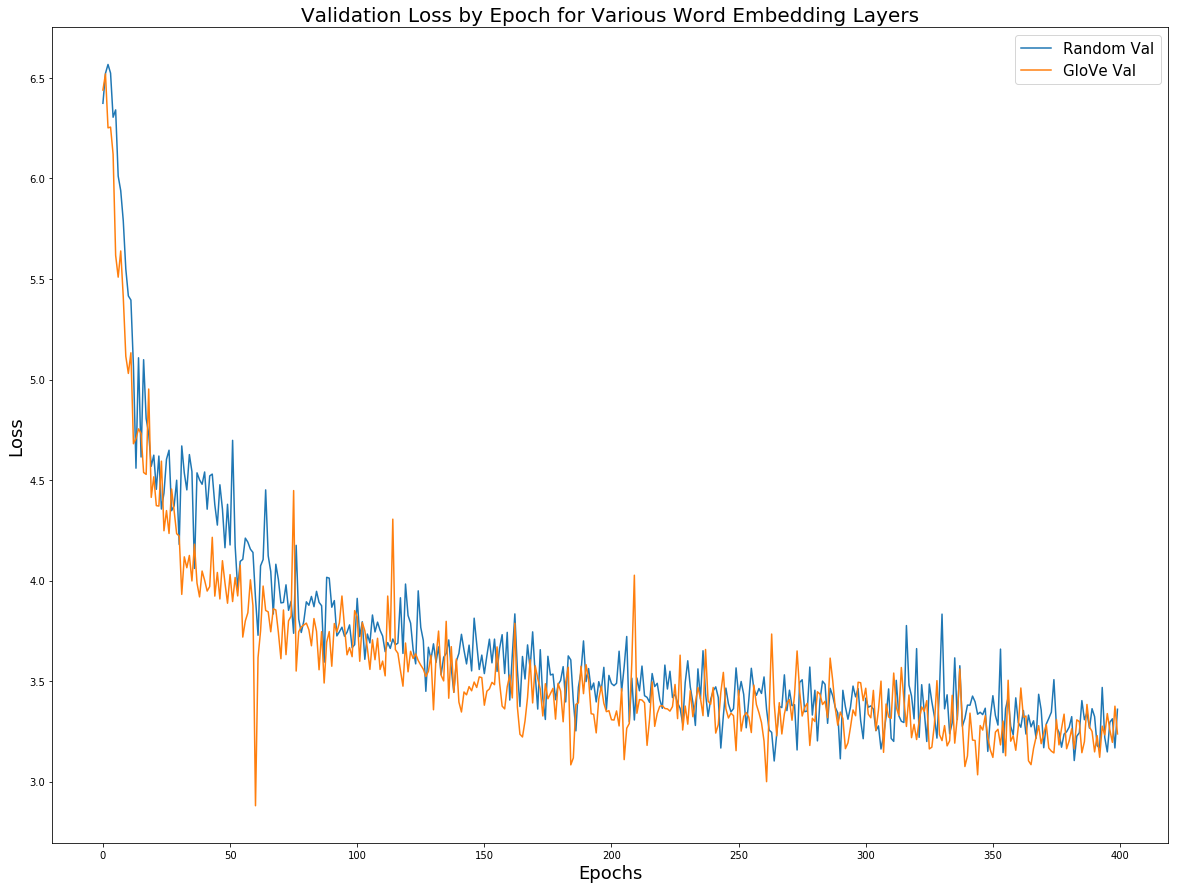

In [18]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Large Model

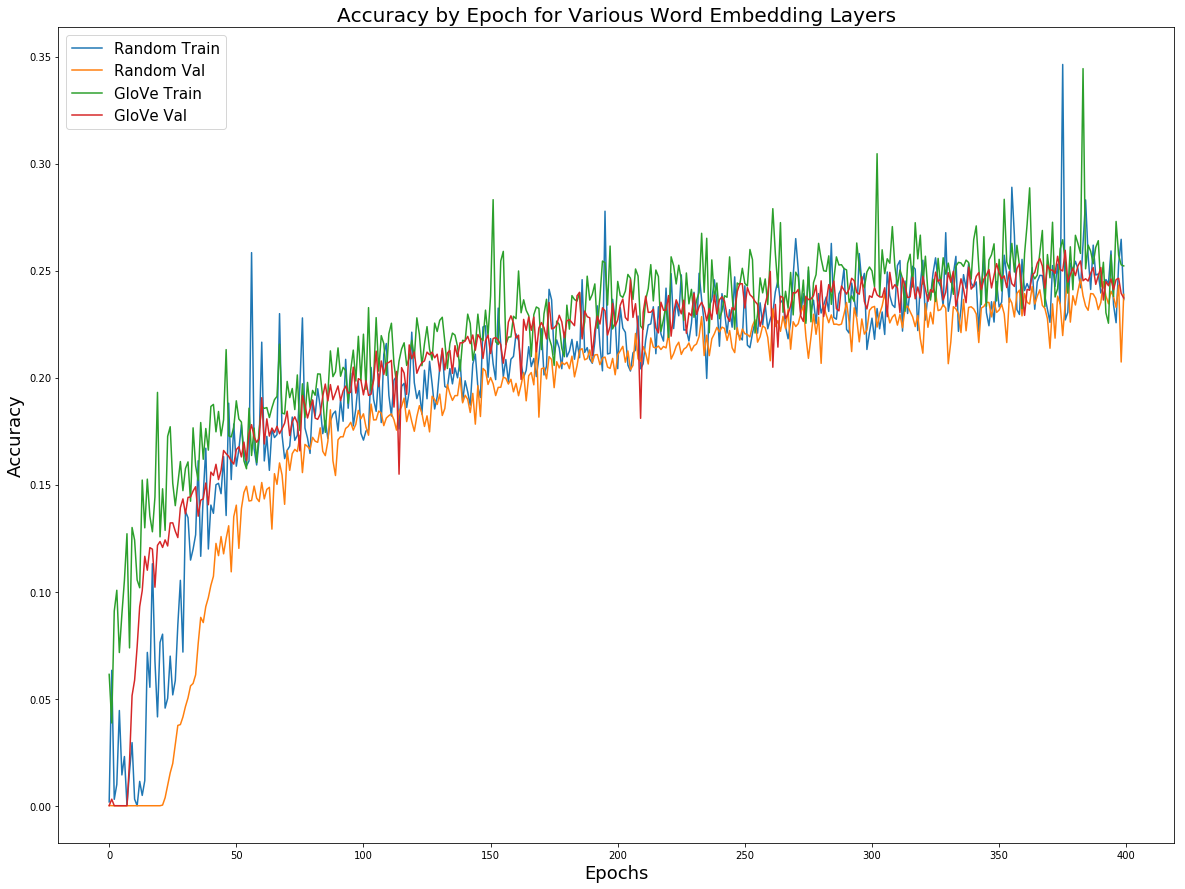

In [19]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_accuracy, label='FastText Train')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Large Model

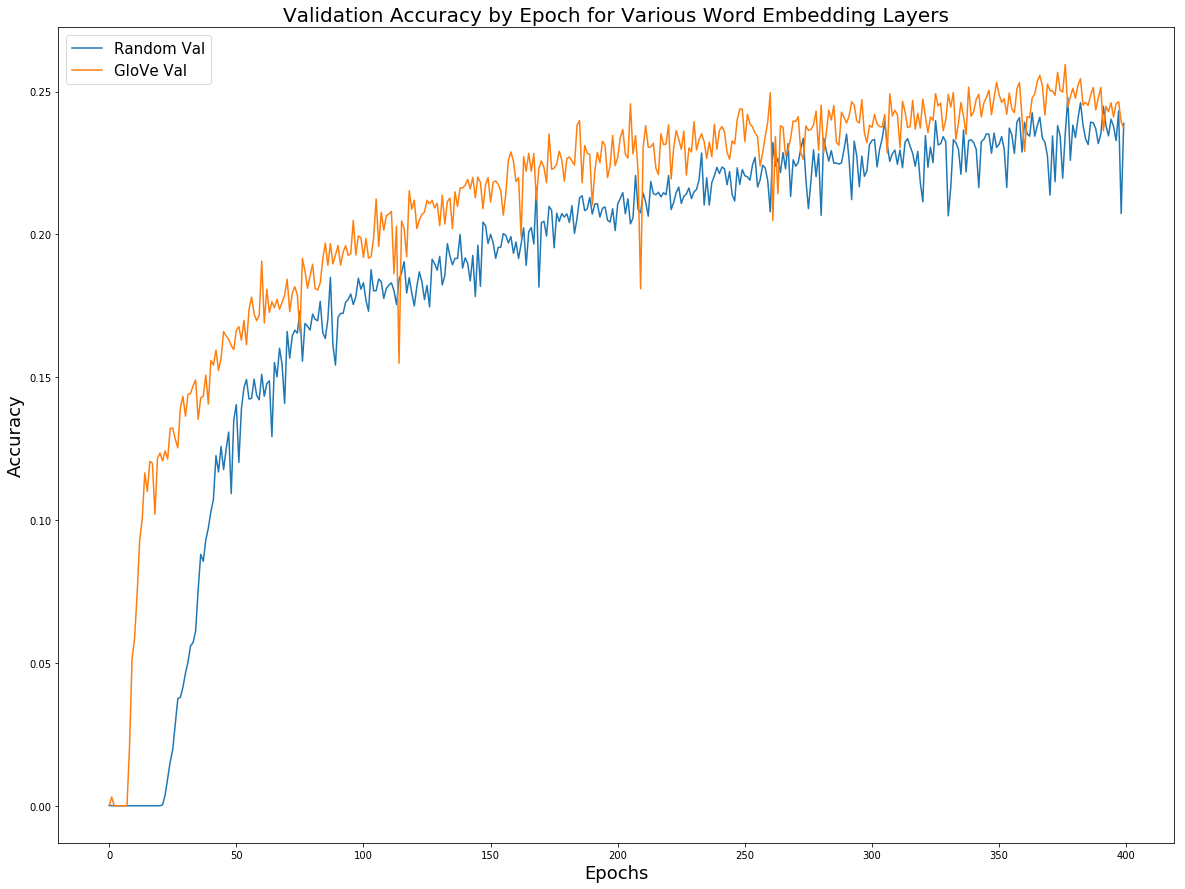

In [20]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()